# Heat equation

Numerical resolution of the one-dimensional heat equation:

$$
\alpha \frac{\partial^2 p}{\partial x^2} = \frac{\partial^2 p}{\partial t}
$$

with given boundary conditions in the ending points of a line.

In [8]:
#We'll need these libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The most advisable numerical scheme is that of central differences in space and backward difference in time.

$$
p_i^{n+1} = p_i^n + \frac{\alpha \Delta t}{\Delta x^2} \left( p_{i+1}^n + p_{i-1}^n - 2 p_i^n \right)
$$


In [85]:
# Numerical parameters
a = 1
nx = 20
nt = 1000
dx = 1/(nx - 1)
dt = 1/(nt - 1)

# Grid
xs = np.linspace(0, 1, nx)
ts = np.linspace(0, 200, nt)

# Initial guess
p = np.zeros((nx, nt))

# Boundary conditions
p[0, :] = 0
p[-1, :] = 1 + 0*np.sin(2 * np.pi * ts / 100)
p[:, 0] = 0
p[:, -1] = 0

In [86]:
c = a * dt / dx**2
for n in range(1, nt):
    for i in range(1, nx-1):
        p[i, n] = p[i, n-1] + c * (p[i-1, n-1] + p[i+1, n-1] - 2*p[i, n-1])

0.36136136136136143


## Visualization

The Laplace equation often models stationary physical phenomena such as:

- Electrostatic fields
- Steady fluid flows
- Steady heat flows

Where the flow is recovered from $p(x, y)$ via a gradient operator:

$\vec f(x, y) = - \vec{\nabla p}$

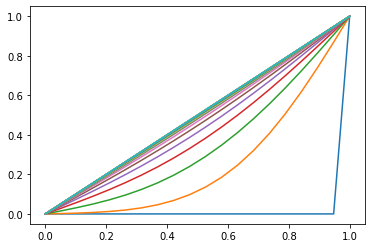

In [87]:
plt.plot(xs, p[:, 1:-2:50]);

## Two dimensions

Numerical resolution of the two-dimensional heat equation:

$$
\alpha \frac{\partial^2 p}{\partial x^2} + \alpha \frac{\partial^2 p}{\partial y^2} = \frac{\partial^2 p}{\partial t}
$$

with given boundary conditions in the boundary of a rectangular region.

The most advisable numerical scheme is that of central differences in space and backward difference in time.

$$
p_i^{n+1} = p_i^n + \frac{\alpha \Delta t}{\Delta x^2} \left( p_{i+1,j}^n + p_{i-1,j}^n - 2 p_{ij}^n \right) + \frac{\alpha \Delta t}{\Delta y^2} \left( p_{i,j+1}^n + p_{i,j-1}^n - 2 p_{ij}^n \right)
$$

In [114]:
# Numerical parameters
a = 1
nx = 20
ny = 20
nt = 1000
dx = 1/(nx - 1)
dy = 1/(ny - 1)
dt = 1/(nt - 1)

# Grid
xs = np.linspace(0, 1, nx)
ys = np.linspace(0, 1, ny)
ts = np.linspace(0, 200, nt)
xm, ym = np.meshgrid(xs, ys)

# Initial guess
p = np.zeros((nx, ny, nt))

# Boundary conditions
p[+0, :, :] = 0
p[-1, :, :] = 1
p[ :, 0, :] = 0
p[ :,-1, :] = 0

In [115]:
cx = a * dt / dx**2
cy = a * dt / dy**2
for n in range(1, nt):
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            p[i, j, n] = p[i, j, n-1] + cx * (p[i-1, j, n-1] + p[i+1, j, n-1] - 2*p[i, j, n-1]) + cy * (p[i, j-1, n-1] + p[i, j-1, n-1] - 2*p[i, j, n-1])

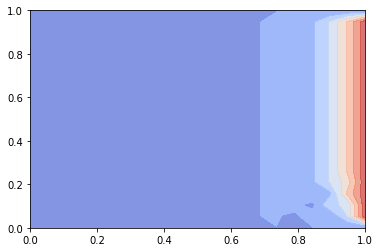

In [119]:
plt.contourf(xs, ys, p[:, :, 5].T, cmap='coolwarm', alpha = 0.7);